### Train SVC image classifier for multiple categories for cifar10
- font: https://www.geeksforgeeks.org/image-classification-using-support-vector-machine-svm-in-python/

In [2]:
import pandas as pd 
import os 
from skimage.transform import resize 
from skimage.io import imread 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
import joblib
from keras.datasets import cifar10

In [26]:
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [23]:
subset_trainX = trainX[np.isin(trainy, [0,1]).flatten()]
subset_trainy = trainy[np.isin(trainy, [0,1]).flatten()]

In [29]:
# Shuffle first (optional)
idx = np.arange(len(subset_trainX))
np.random.shuffle(idx)

# get first 1% of data
subset_trainX = subset_trainX[:int(.01*len(idx))]
subset_trainy = subset_trainy[:int(.01*len(idx))]

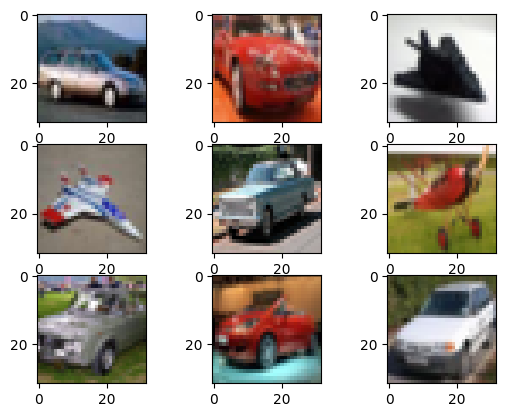

In [31]:
# plot first few images
for i in range(0,9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(subset_trainX[i])
# show the figure
plt.show()

In [33]:
categories=['airplane','automobile'] 

## Use custom images for model training
# flat_data_arr=[] #input array 
# target_arr=[] #output array 
# datadir='train_images/'
# #path which contains all the categories of images 
# for i in categories: 
	
# 	print(f'loading... category : {i}') 
# 	path=os.path.join(datadir,i) 
# 	for img in os.listdir(path): 
# 		img_array=imread(os.path.join(path,img)) 
# 		img_resized=resize(img_array,(150,150,3)) 
# 		flat_data_arr.append(img_resized.flatten()) 
# 		target_arr.append(categories.index(i)) 
# 	print(f'loaded category:{i} successfully') 
# flat_data=np.array(flat_data_arr) 
# target=np.array(target_arr)

In [35]:
flat_data_arr = []
for img_resized in subset_trainX: 
    # img_resized=resize(img_array,(150,150,3)) 
    flat_data_arr.append(img_resized.flatten())
flat_data=np.array(flat_data_arr)

In [36]:
#dataframe 
df=pd.DataFrame(flat_data) 
df['Target']=subset_trainy 
df.shape

(100, 3073)

In [38]:
#input data 
x=df.iloc[:,:-1] 
#output data 
y=df.iloc[:,-1]

In [41]:
# Splitting the data into training and testing sets 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10, 
											random_state=27, 
											stratify=y) 

In [42]:
# Defining the parameters grid for GridSearchCV 
param_grid={'C':[0.1,1,10,100], 
			'gamma':[0.0001,0.001,0.1,1], 
			'kernel':['rbf','poly']} 

# Creating a support vector classifier 
svc=svm.SVC(probability=True) 

# Creating a model using GridSearchCV with the parameters grid 
model=GridSearchCV(svc,param_grid)

In [43]:
# Training the model using the training data 
model.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [44]:
# Testing the model using the testing data 
y_pred = model.predict(x_test) 

# Calculating the accuracy of the model 
accuracy = accuracy_score(y_pred, y_test) 

# Print the accuracy of the model 
print(f"The model is {accuracy*100}% accurate")

The model is 80.0% accurate


In [45]:
print(classification_report(y_test, y_pred, target_names=categories))

              precision    recall  f1-score   support

    airplane       0.67      1.00      0.80         4
  automobile       1.00      0.67      0.80         6

    accuracy                           0.80        10
   macro avg       0.83      0.83      0.80        10
weighted avg       0.87      0.80      0.80        10



In [46]:
joblib.dump(model, 'svc_classifier.pkl')

['svc_classifier.pkl']